# 泰坦尼克号乘客获救情况分析

## 项目简介
Titanic可以算的上电影史上最知名的爱情片和灾难片之一了，电影中很多情景至今历历在目。而实际中Titianic号的沉没，也是世界航海史上一个永恒的话题。
1912年4月15日，这艘号称“永不沉没”的泰坦尼克号在首航期间，撞上冰山后沉没，船上的2224名乘客和机组人员，其中只有772人存活下来，生还率只有32%。 本项目打算从数据分析的角度，解析一下Titanic号上获救乘客的信息，找出在所有乘客中，什么样的人具有最高的生存率。

## 数据来源
在这个项目中，数据是从Kaggle网站上获取的CSV数据，分为有标注(是否存活)的测试数据和无标注的验证数据。

## 分析目录
### 1.导入数据
### 2.理解数据
    2.1 整体信息
    2.2 单因素分析
    2.3 多因素交叉分析
### 3.特征工程
    3.1 特征提取
    3.2 特征选择
### 4.建模
    4.1 建立训练集和测试集
    4.2 建立并拟合模型
    4.3 评估模型
### 5.方案实施
    5.1 预测验证集
    5.2 结论

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# 1.导入数据

In [79]:
train_df=pd.read_csv('titanic/train.csv')
test_df=pd.read_csv('titanic/test.csv')

# 2.理解数据

# 2.1整体信息

In [80]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [81]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [82]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

测试数据集中共有12个字段，PassengerId：乘客编号，Survived：乘客是否存活，Pclass：乘客所在的船舱等级；Name：乘客姓名，Sex：乘客性别，Age：乘客年龄，SibSp：乘客的兄弟姐妹和配偶数量，Parch：乘客的父母与子女数量，Ticket：票的编号，Fare：票价，Cabin：座位号，Embarked：乘客登船码头。 共有891位乘客的数据信息。其中167位乘客的年龄数据缺失，2位乘客的登船码头数据缺失，687位乘客的船舱数据缺失。  
验证数据集中共11个字段，相比测试数据集少了标签字段Survived。共有418位乘客的数据信息，其中86位年龄数据缺失，1位票价数据缺失，327位座位号数据缺失。  

## 2.2 单因素分析

In [83]:
dataset=[train_df,test_df]

### 船舱等级

In [84]:
train_df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [85]:
train_df.groupby('Pclass').Survived.mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

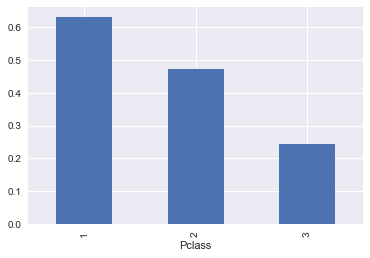

In [86]:
train_df.groupby('Pclass').Survived.mean().plot.bar()

#### 从船舱等级可以看出，高等级的船舱的人存活率更高一些

### 性别

In [87]:
train_df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [88]:
train_df.groupby('Sex').Survived.mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

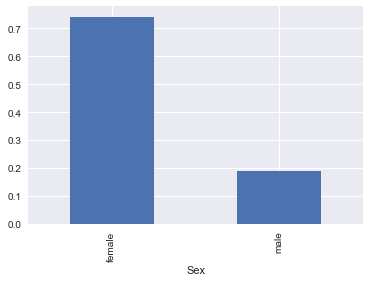

In [89]:
train_df.groupby('Sex').Survived.mean().plot.bar()

#### 从性别看出，女性存活率是男性3倍多

### 年龄

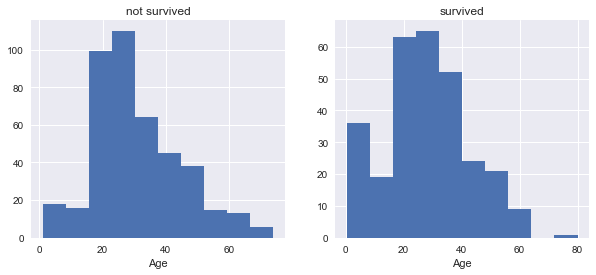

In [90]:
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.hist(train_df[train_df.Survived==0].Age.dropna(),bins=10)
plt.xlabel('Age')
plt.title('not survived')
plt.subplot(122)
plt.hist(train_df[train_df.Survived==1].Age.dropna(),bins=10)
plt.xlabel('Age')
plt.title('survived')

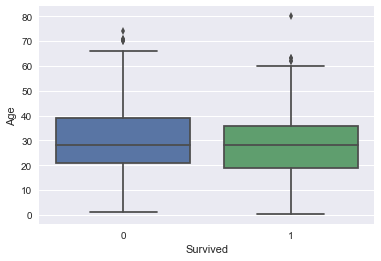

In [91]:
sns.boxplot(x='Survived',y='Age',data=train_df)

#### 在年龄分布中，没能活下来的人更趋于年轻化

### 同层亲属数

In [92]:
pd.crosstab(train_df.Survived,train_df.SibSp)

SibSp,0,1,2,3,4,5,8
Survived,,,,,,,
0,398,97,15,12,15,5,7
1,210,112,13,4,3,0,0


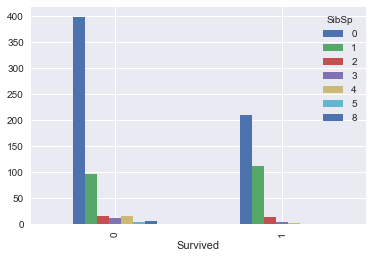

In [93]:
pd.crosstab(train_df.Survived,train_df.SibSp).plot.bar()

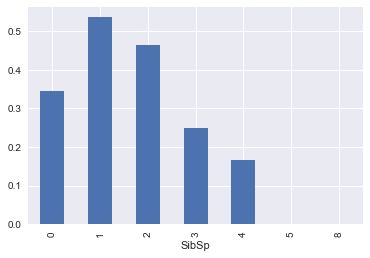

In [94]:
train_df.groupby('SibSp').Survived.mean().plot(kind='bar')

#### 没有同层亲属或者有大于等于3个的死亡率相对其他的会高一些

### 直系亲属数

In [95]:
pd.crosstab(train_df.Survived,train_df.Parch)

Parch,0,1,2,3,4,5,6
Survived,,,,,,,
0,445,53,40,2,4,4,1
1,233,65,40,3,0,1,0


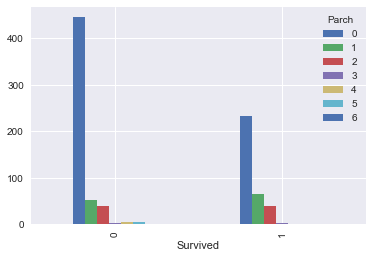

In [96]:
pd.crosstab(train_df.Survived,train_df.Parch).plot.bar()

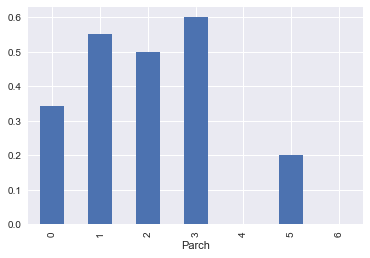

In [97]:
train_df.groupby('Parch').Survived.mean().plot(kind='bar')

#### 没有直系亲属或者有大于等于4个的死亡率相对其他的会高一些

### 票价

/Users/xucoolboy/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
/Users/xucoolboy/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


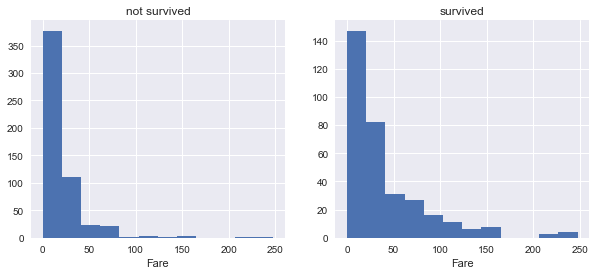

In [98]:
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.hist(train_df[train_df.Survived==0][train_df.Fare<250].Fare.dropna(),bins=12)
plt.xlabel('Fare')
plt.title('not survived')
plt.subplot(122)
plt.hist(train_df[train_df.Survived==1][train_df.Fare<250].Fare.dropna(),bins=12)
plt.xlabel('Fare')
plt.title('survived')

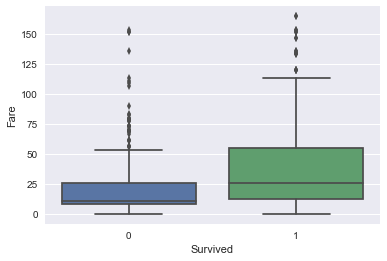

In [99]:
sns.boxplot(x='Survived',y='Fare',data=train_df.query('Fare<200'))

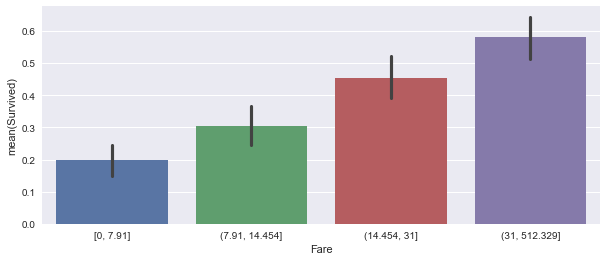

In [100]:
plt.figure(figsize=(10,4))
sns.barplot(pd.qcut(train_df.Fare,4),train_df.Survived,)

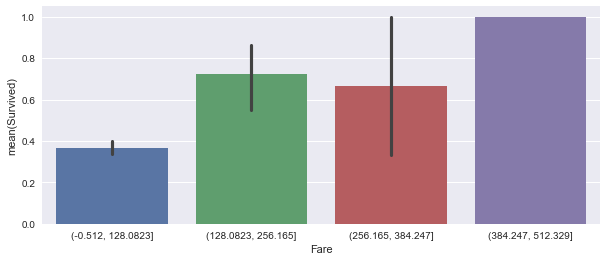

In [101]:
plt.figure(figsize=(10,4))
sns.barplot(pd.cut(train_df.Fare,4),train_df.Survived,)

#### 明显可以看出高票价的相对低票价的存活率更高

### 座位号

In [102]:
pd.crosstab(train_df.Survived,train_df.Cabin)


Cabin,A10,A14,A16,A19,A20,A23,A24,A26,A31,A32,...,E8,F E69,F G63,F G73,F2,F33,F38,F4,G6,T
Survived,,,,,,,,,,,,,,,,,,,,,
0,1,1,0,1,0,0,1,0,0,1,...,0,0,1,2,1,0,1,0,2,1
1,0,0,1,0,1,1,0,1,1,0,...,2,1,0,0,2,3,0,2,2,0


In [103]:
#缺失座位号的先用U填充
train_df.Cabin.fillna('U',inplace=True)

In [104]:
train_df.Cabin.str[0].head()

0    U
1    C
2    U
3    C
4    U
Name: Cabin, dtype: object

In [105]:
train_df.Cabin.str[0].value_counts()

U    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [106]:
pd.crosstab(train_df.Survived,train_df.Cabin.str[0])

Cabin,A,B,C,D,E,F,G,T,U
Survived,,,,,,,,,
0,8,12,24,8,8,5,2,1,481
1,7,35,35,25,24,8,2,0,206


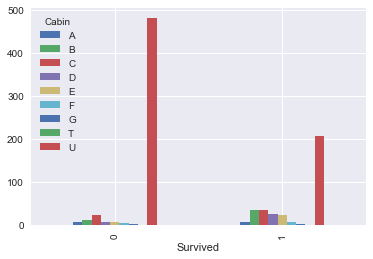

In [107]:
pd.crosstab(train_df.Survived,train_df.Cabin.str[0]).plot.bar()

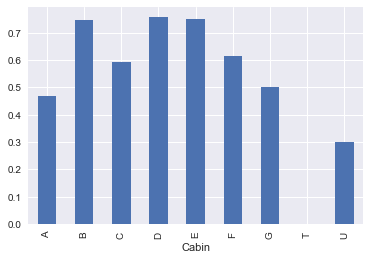

In [108]:
train_df.groupby(train_df.Cabin.str[0]).Survived.mean().plot(kind='bar')

#### 不同字母开头代表不同船舱号，图表明不同船舱号生存率没有明显差异，座位号缺失的反而生存率较低

### 登船港口

In [109]:
train_df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [110]:
train_df.pivot_table(index='Embarked',values='Survived')

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

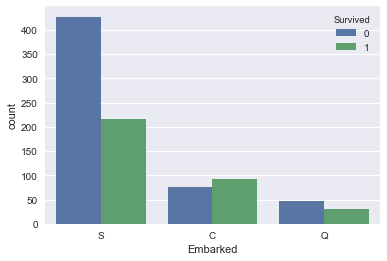

In [111]:
sns.countplot(train_df.Embarked,hue=train_df.Survived)

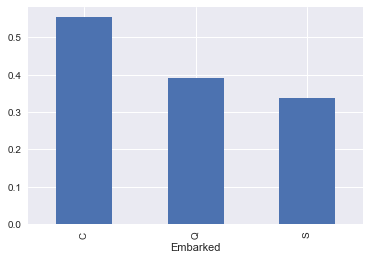

In [112]:
train_df.pivot_table(index='Embarked',values='Survived').plot.bar()

#### 很明显根据登船港口，存活率C>Q>S

## 2.3 多因素交叉分析

### 舱等级，年龄，存活

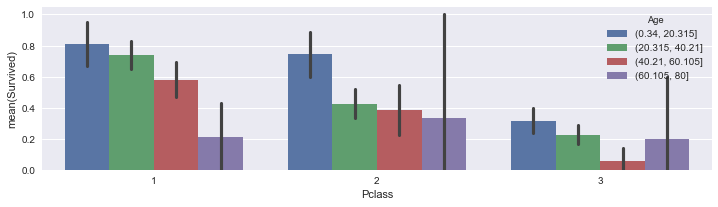

In [113]:
plt.figure(figsize=(12,3))
sns.barplot(train_df.Pclass,train_df.Survived,hue=pd.cut(train_df.Age,4))

#### 同样等级的舱中，基本上越年轻存活率越高，且舱等级越高，整体存活率越高

### 舱等级，性别，存活

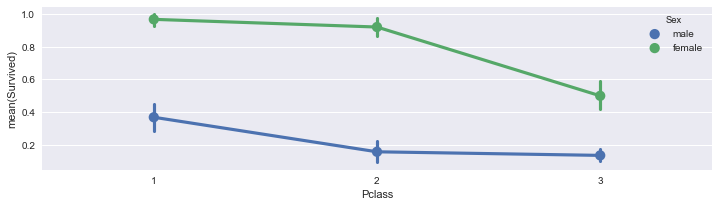

In [114]:
plt.figure(figsize=(12,3))
sns.pointplot(train_df.Pclass,train_df.Survived,hue=train_df.Sex)

### 上船港口，性别，存活

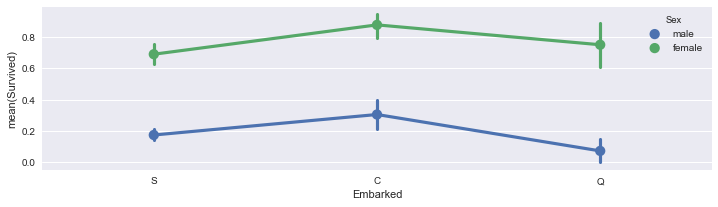

In [115]:
plt.figure(figsize=(12,3))
sns.pointplot(train_df.Embarked,train_df.Survived,hue=train_df.Sex)

In [116]:
train_df.pivot_table(index=['Embarked'],columns='Sex',values='Survived')

Sex,female,male
Embarked,,
C,0.876712,0.305263
Q,0.750000,0.073171
S,0.689655,0.174603


### 上船港口，票价，性别，存活

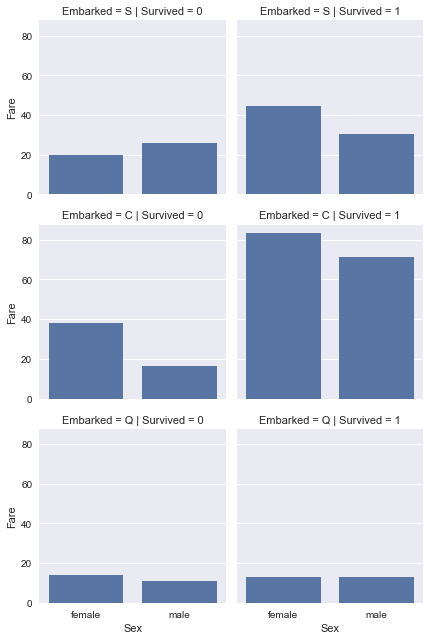

In [117]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid =sns.FacetGrid(row='Embarked',col='Survived',data=train_df,)
grid.map(sns.barplot,'Sex','Fare',ci=None)
grid.add_legend()

#### 男性票价普遍高于女性，在C上船的乘客中，存活的平均票价要显著大于另外两个上船点

# 3. 特征工程

## 3.1 特征提取

In [118]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [119]:
#连接测试数据集和验证数据集
full=pd.concat([train_df,test_df],ignore_index=True)

In [120]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          982 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


总的集合里共有12个字段，PassengerId：乘客编号，Survived：乘客是否存活，Pclass：乘客所在的船舱等级；Name：乘客姓名，Sex：乘客性别，Age：乘客年龄，SibSp：乘客的兄弟姐妹和配偶数量，Parch：乘客的父母与子女数量，Ticket：票的编号，Fare：票价，Cabin：座位号，Embarked：乘客登船码头。   
共有1309位乘客的数据信息。其中263位乘客的年龄数据缺失，2位乘客的登船码头数据缺失，1位乘客票价数据缺失，327位乘客的船舱数据缺失。

### 3.1.1 直接类别型分类

### 船舱等级Pclass

In [121]:
Pclass_df=pd.get_dummies(full.Pclass,prefix='Pclass')

In [122]:
full=pd.concat([full,Pclass_df],axis=1)

In [123]:
full=full.drop('Pclass',axis=1)

### 登船港口Embarked

In [124]:
full.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [125]:
full.Embarked.fillna('S',inplace=True)

In [126]:
full.Embarked.value_counts()

S    916
C    270
Q    123
Name: Embarked, dtype: int64

In [127]:
Embarked_df=pd.DataFrame(full.Embarked)

In [128]:
Embarked_df.Embarked.value_counts()

S    916
C    270
Q    123
Name: Embarked, dtype: int64

In [129]:
Embarked_df=pd.get_dummies(Embarked_df.Embarked,prefix='Embarked')

In [130]:
full=pd.concat([full,Embarked_df],axis=1)

### 性别

In [131]:
full['Sex']=full.Sex.apply(lambda x:1 if x=='male' else 0)#最好用loc

### 3.1.2 字符串型类别

### 姓名Name

In [133]:
full.Name.str.split(',').str[1].str.split('.').str[0].str.strip().value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Dr                8
Rev               8
Col               4
Mlle              2
Ms                2
Major             2
the Countess      1
Mme               1
Don               1
Dona              1
Lady              1
Capt              1
Jonkheer          1
Sir               1
Name: Name, dtype: int64

In [134]:
Name_df=pd.DataFrame(full.Name.str.split(',').str[1].str.split('.').str[0].str.strip())

In [136]:
Name_df.Name.value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Dr                8
Rev               8
Col               4
Mlle              2
Ms                2
Major             2
the Countess      1
Mme               1
Don               1
Dona              1
Lady              1
Capt              1
Jonkheer          1
Sir               1
Name: Name, dtype: int64

In [137]:
title_dict={'Mr':'Mr',
           'Miss':'Miss',
           'Mrs':'Mrs',
           'Master':'Master',
           'Rev':'Officer',
           'Dr':'Officer',
           'Col':'Officer',
           'Major':'Officer',
           'Ms':'Mrs',
           'Mlle':'Miss',
           'Jonkheer':'Royalty',
           'Dona':'Royalty',
           'Mme':'Mrs',
           'Don':'Royalty',
           'Lady':'Royalty',
           'the Countess':'Royalty',
           'Sir':'Royalty',
           'Capt':'Officer'}

In [138]:
Name_df['Name']=Name_df.Name.map(title_dict)

In [139]:
Name_df['Name'].value_counts()

Mr         757
Miss       262
Mrs        200
Master      61
Officer     23
Royalty      6
Name: Name, dtype: int64

In [140]:
Name_df=pd.get_dummies(Name_df['Name'],prefix='Name')

In [141]:
full=pd.concat([full,Name_df],axis=1)

In [142]:
full.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Sex,SibSp,Survived,...,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Name_Officer,Name_Royalty
0,22.0,U,S,7.2500,"Braund, Mr. Owen Harris",0,1,1,1,0.0,...,1,0,0,1,0,0,1,0,0,0
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,0,1,1.0,...,0,1,0,0,0,0,0,1,0,0
2,26.0,U,S,7.9250,"Heikkinen, Miss. Laina",0,3,0,0,1.0,...,1,0,0,1,0,1,0,0,0,0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,0,1,1.0,...,0,0,0,1,0,0,0,1,0,0
4,35.0,U,S,8.0500,"Allen, Mr. William Henry",0,5,1,0,0.0,...,1,0,0,1,0,0,1,0,0,0


### 船票编号Tickits

#### 和标签关联性不大，可以舍弃

### 座位号Cabin

In [143]:
Cabin_df=pd.DataFrame(full.Cabin.fillna('U').str.strip().str[0])#此处用map( lambda c : c[0] )更简单

In [145]:
Cabin_df.Cabin.value_counts()

U    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Cabin, dtype: int64

In [146]:
Cabin_df=pd.get_dummies(Cabin_df.Cabin,prefix='Cabin')

In [147]:
full=pd.concat([full,Cabin_df],axis=1)

In [148]:
full.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Sex,SibSp,Survived,...,Name_Royalty,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,22.0,U,S,7.2500,"Braund, Mr. Owen Harris",0,1,1,1,0.0,...,0,0,0,0,0,0,0,0,0,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,0,1,1.0,...,0,0,0,1,0,0,0,0,0,0
2,26.0,U,S,7.9250,"Heikkinen, Miss. Laina",0,3,0,0,1.0,...,0,0,0,0,0,0,0,0,0,1
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,0,1,1.0,...,0,0,0,1,0,0,0,0,0,0
4,35.0,U,S,8.0500,"Allen, Mr. William Henry",0,5,1,0,0.0,...,0,0,0,0,0,0,0,0,0,1


### 3.1.3 数值型类别

### 票价Fare

In [149]:
full[full.Fare.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Sex,SibSp,Survived,...,Name_Royalty,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
1043,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,1,0,NaN,...,0,0,0,0,0,0,0,0,0,1


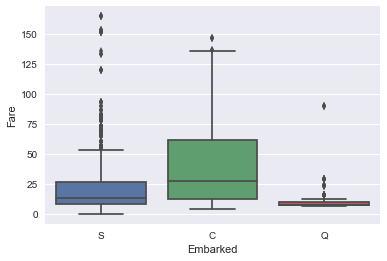

In [150]:
sns.boxplot('Embarked','Fare',data=full[full.Fare<200])

#### 说明上船地点和票价有关系

In [151]:
full.loc[(full.Age>60)&(full.Embarked_S==1)&(full.Pclass_3==1),'Fare']

326     6.2375
483     9.5875
851     7.7750
1043       NaN
Name: Fare, dtype: float64

In [152]:
full.loc[(full.Age>60)&(full.Embarked_S==1)&(full.Pclass_3==1),'Fare'].mean()

7.866666666666667

In [153]:
Fare_df=pd.DataFrame(full.Fare.fillna(full.loc[(full.Age>60)&(full.Embarked_S==1)&(full.Pclass_3==1),'Fare'].mean()))

In [154]:
Fare_df[Fare_df.Fare.isnull()]

,Fare


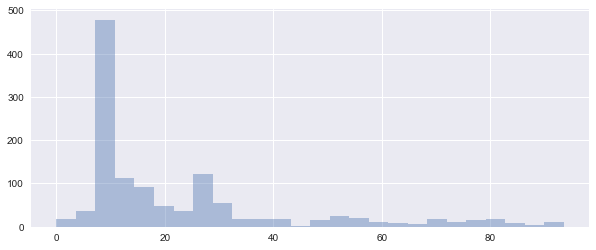

In [155]:
plt.figure(figsize=(10,4))
sns.distplot(Fare_df[Fare_df.Fare<100],kde=False)


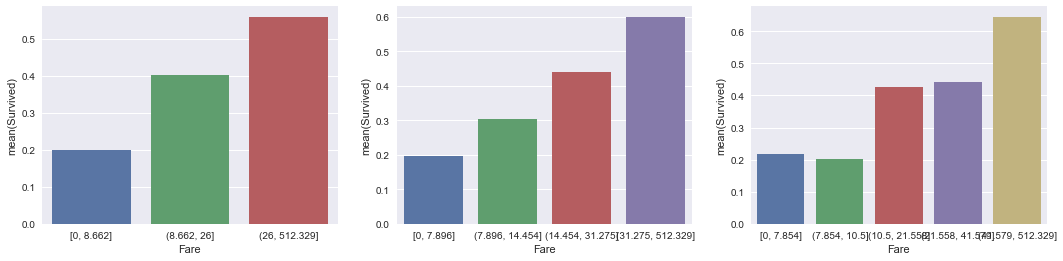

In [156]:
#由于票价分布比较散，所以采用qcut分箱
plt.figure(figsize=(18,4))
plt.subplot(1,3,1)
sns.barplot(pd.qcut(Fare_df.Fare,3),full.Survived,ci=None)
plt.subplot(1,3,2)
sns.barplot(pd.qcut(Fare_df.Fare,4),full.Survived,ci=None)
plt.subplot(1,3,3)
sns.barplot(pd.qcut(Fare_df.Fare,5),full.Survived,ci=None)

#### 分五段后有区间差异不明显，所以采用四段

In [157]:
Fare_df=pd.get_dummies(pd.qcut(Fare_df.Fare,4),prefix='Fare')

In [158]:
full=pd.concat([full,Fare_df],axis=1)

In [159]:
full.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Sex,SibSp,Survived,...,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,"Fare_[0, 7.896]","Fare_(7.896, 14.454]","Fare_(14.454, 31.275]","Fare_(31.275, 512.329]"
0,22.0,U,S,7.2500,"Braund, Mr. Owen Harris",0,1,1,1,0.0,...,0,0,0,0,0,1,1,0,0,0
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,0,1,1.0,...,0,0,0,0,0,0,0,0,0,1
2,26.0,U,S,7.9250,"Heikkinen, Miss. Laina",0,3,0,0,1.0,...,0,0,0,0,0,1,0,1,0,0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,0,1,1.0,...,0,0,0,0,0,0,0,0,0,1
4,35.0,U,S,8.0500,"Allen, Mr. William Henry",0,5,1,0,0.0,...,0,0,0,0,0,1,0,1,0,0


In [160]:
Fare_df.head()

,"Fare_[0, 7.896]","Fare_(7.896, 14.454]","Fare_(14.454, 31.275]","Fare_(31.275, 512.329]"
0,1,0,0,0
1,0,0,0,1
2,0,1,0,0
3,0,0,0,1
4,0,1,0,0


In [161]:
#Fare_df.columns=Fare_df.columns.str.replace('Age','Fare')#当时命名写成Age开头了

### 家庭人口Familysize

In [162]:
Familysize_df=pd.DataFrame(full.SibSp+full.Parch+1,columns=['Familysize'])

In [163]:
Familysize_df.head()

,Familysize
0,2
1,2
2,1
3,2
4,1


In [164]:
Familysize_df.head()

,Familysize
0,2
1,2
2,1
3,2
4,1


In [165]:
Familysize_df['Familysize'].value_counts()

1     790
2     235
3     159
4      43
6      25
5      22
7      16
11     11
8       8
Name: Familysize, dtype: int64

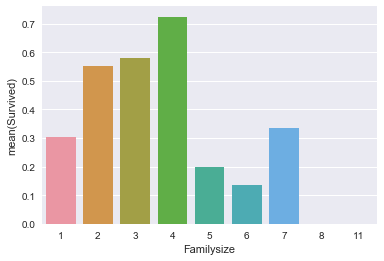

In [166]:
sns.barplot(Familysize_df['Familysize'],full.Survived,ci=False)

#### 可以看出1的生存概率很小，应该作为一个分箱切分点，再加上2-4，5及以上三类

In [167]:
pd.cut(Familysize_df['Familysize'],bins=[0,1,4,float("inf")]).head()

0    (1, 4]
1    (1, 4]
2    (0, 1]
3    (1, 4]
4    (0, 1]
Name: Familysize, dtype: category
Categories (3, object): [(0, 1] < (1, 4] < (4, inf]]

In [168]:
Familysize_df=pd.get_dummies(pd.cut(Familysize_df['Familysize'],bins=[0,1,4,float("inf")]),prefix='Familysize')

In [169]:
full=pd.concat([full,Familysize_df],axis=1)

### 年龄Age

In [170]:
#full['Age']=pd.concat([train_df['Age'],test_df['Age']],ignore_index=True)#还原full的Age列

In [171]:
### 法一，用随机森林预测；法二，根据相关属性人群的均值预测；法三，用－999填充

#### 法一：用随机森林预测

In [172]:
full.groupby(pd.cut(full.Age,bins=4)).Survived.mean()

Age
(0.0902, 20.128]     0.458101
(20.128, 40.085]     0.397403
(40.085, 60.0425]    0.390625
(60.0425, 80]        0.227273
Name: Survived, dtype: float64

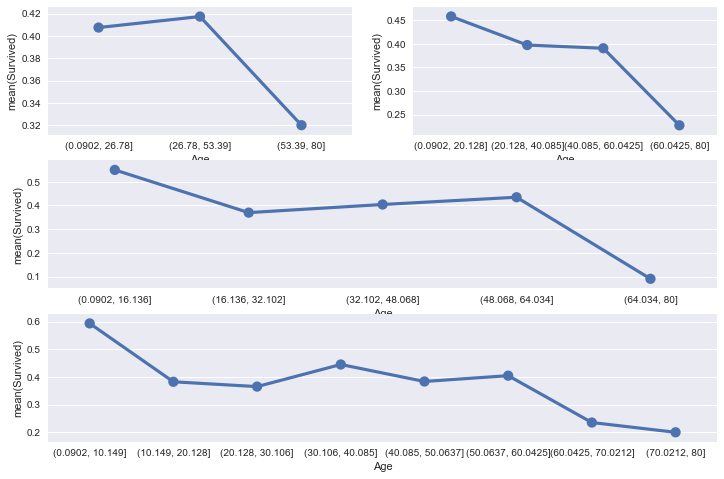

In [173]:
plt.figure(figsize=(12,8))
plt.subplot(3,2,1)
sns.pointplot(pd.cut(full.Age,bins=3),full.Survived,ci=False)
plt.subplot(3,2,2)
sns.pointplot(pd.cut(full.Age,bins=4),full.Survived,ci=False)
plt.subplot(3,1,2)
sns.pointplot(pd.cut(full.Age,bins=5),full.Survived,ci=False)
plt.subplot(3,1,3)
sns.pointplot(pd.cut(full.Age,bins=8),full.Survived,ci=False)

#### 根据图，分成5段

In [174]:
tmp_Age=pd.cut(full.Age,bins=5).astype('object')#不转成objec，后面预测数据类型为object，无法赋值给category类型(分箱后类型)

In [175]:
tem_df=pd.concat([Pclass_df,full.Sex,tmp_Age,Fare_df,Familysize_df,Cabin_df,Embarked_df],axis=1)

In [176]:
tem_df.head()

,Pclass_1,Pclass_2,Pclass_3,Sex,Age,"Fare_[0, 7.896]","Fare_(7.896, 14.454]","Fare_(14.454, 31.275]","Fare_(31.275, 512.329]","Familysize_(0, 1]",...,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1,1,"(16.136, 32.102]",1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,1,0,0,0,"(32.102, 48.068]",0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
2,0,0,1,0,"(16.136, 32.102]",0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3,1,0,0,0,"(32.102, 48.068]",0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
4,0,0,1,1,"(32.102, 48.068]",0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,1


In [177]:
tem_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 24 columns):
Pclass_1                  1309 non-null uint8
Pclass_2                  1309 non-null uint8
Pclass_3                  1309 non-null uint8
Sex                       1309 non-null int64
Age                       1046 non-null object
Fare_[0, 7.896]           1309 non-null uint8
Fare_(7.896, 14.454]      1309 non-null uint8
Fare_(14.454, 31.275]     1309 non-null uint8
Fare_(31.275, 512.329]    1309 non-null uint8
Familysize_(0, 1]         1309 non-null uint8
Familysize_(1, 4]         1309 non-null uint8
Familysize_(4, inf]       1309 non-null uint8
Cabin_A                   1309 non-null uint8
Cabin_B                   1309 non-null uint8
Cabin_C                   1309 non-null uint8
Cabin_D                   1309 non-null uint8
Cabin_E                   1309 non-null uint8
Cabin_F                   1309 non-null uint8
Cabin_G                   1309 non-null uint8
Cabin_T           

In [178]:
know_age=tem_df.Age[tem_df.Age.notnull()]

In [179]:
know_feature=tem_df[tem_df.Age.notnull()].drop('Age',axis=1)

In [180]:
unknow_age=tem_df.Age[tem_df.Age.isnull()]

In [181]:
unknow_feature=tem_df[tem_df.Age.isnull()].drop('Age',axis=1)

In [182]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier,export_graphviz

In [183]:
clf=RandomForestClassifier()
clf.fit(know_feature,know_age)#一开始没转换报错了,预测分类用classifier，预测数值用regression

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [184]:
tmp_Age.dtype

dtype('O')

In [186]:
unknow_age.shape

(263,)

In [187]:
tmp_Age[tmp_Age.isnull()].shape

(263,)

In [188]:
tmp_Age[tmp_Age.isnull()]=clf.predict(unknow_feature)#填充缺失年龄

In [189]:
know_age_pred=clf.predict(know_feature)

In [190]:
from sklearn.metrics import accuracy_score, recall_score, f1_score,confusion_matrix

In [191]:
confusion_matrix(know_age,know_age_pred)

array([[ 57,  55,  19,   3,   0],
       [ 12, 456,  40,  15,   1],
       [ 10, 134, 107,  17,   1],
       [  1,  48,  17,  40,   0],
       [  0,   7,   4,   1,   1]])

In [192]:
accuracy_score(know_age,know_age_pred)

0.6319311663479924

In [193]:
tmp_Age.value_counts()

(16.136, 32.102]    722
(32.102, 48.068]    296
(0.0902, 16.136]    156
(48.068, 64.034]    120
(64.034, 80]         15
Name: Age, dtype: int64

In [194]:
tmp_Age=tmp_Age.astype('category')#不改成category类型就会无序，画图不按顺序排

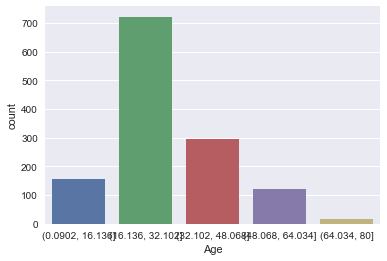

In [195]:
sns.countplot(tmp_Age)

In [196]:
Age_df1=pd.get_dummies(tmp_Age,prefix='Age')

#### 方法二：根据相关属性人群的均值或中位数预测

In [ ]:
#full['Age']=pd.concat([train_df['Age'],test_df['Age']],ignore_index=True)#还原Age列

In [ ]:
#选择姓名，船舱等级来预测年龄

In [ ]:
tmp2=pd.concat([train_df[['Name','Pclass','Age']],test_df[['Name','Pclass','Age']]],ignore_index=True)

In [ ]:
tmp2.head()

In [ ]:
tmp2.info()

In [ ]:
tmp2['Name']=tmp2.Name.str.split(',').str[1].str.split('.').str[0].str.strip()

In [ ]:
tmp2['Name']=tmp2['Name'].map(title_dict)

In [ ]:
tmp2['Name'].value_counts()

In [ ]:
grid=sns.FacetGrid(tmp2,col='Name')
grid.map(sns.distplot,'Age')

In [ ]:
grid=sns.FacetGrid(tmp2,col='Pclass')
grid.map(sns.distplot,'Age')

#### 不同称谓和不同舱等级的年龄分布还是有显著差异的

In [ ]:
tmp2.loc[(tmp2.Name=='Mr')&(tmp2.Pclass==1),'Age'].median()

In [ ]:
#遍历分组空值，用每组中位数填充。注意切片中fillna的inplace无法生效,切片一定要用loc并且用一个［］写完筛选，不然无法赋值
for i in ['Mr','Miss','Mrs','Master','Officer','Royalty']:
        for j in [1,2,3]:
            med=tmp2.loc[(tmp2.Name==i)&(tmp2.Pclass==j),'Age'].median()
            tmp2.loc[(tmp2.Name==i)&(tmp2.Pclass==j)&(tmp2.Age.isnull()),'Age']=med

In [ ]:
tmp2[tmp2.Age.isnull()]

In [ ]:
Age_df2=pd.get_dummies(pd.cut(tmp2.Age,bins=5),prefix='Age')

In [ ]:
sns.countplot(pd.cut(tmp2.Age,bins=5))

#### 方法三：分组预测简便方法

In [ ]:
tmp3=pd.concat([train_df[['Name','Pclass','Age']],test_df[['Name','Pclass','Age']]],ignore_index=True)
tmp3['Name']=tmp2['Name'].map(title_dict)
#到这里步骤一致

In [ ]:
tmp_group=tmp3.groupby(['Name','Pclass']).Age.median()#fillna中一定要是series类型

In [ ]:
tmp_group

In [ ]:
tmp3.set_index(['Name','Pclass'],inplace=True)#注意index的名称直接写名字，不用加数据框名

In [ ]:
tmp3.head()

In [ ]:
tmp3.Age.fillna(tmp_group,inplace=True)

In [ ]:
tmp3.reset_index(inplace=True)

In [ ]:
tmp3.Age.head()

In [ ]:
Age_df3=pd.get_dummies(pd.cut(tmp3.Age,bins=5),prefix='Age')

In [ ]:
pd.cut(tmp3.Age,bins=5).value_counts()

In [ ]:
sns.countplot(pd.cut(tmp3.Age,bins=5))
plt.

## 3.2 特征选择

In [ ]:
#full.drop(['Age_(0.0902, 16.136]','Age_(16.136, 32.102]','Age_(32.102, 48.068]','Age_(48.068, 64.034]','Age_(64.034, 80]'],
         inplace=True,axis=1)#更改年龄特征

In [197]:
full=pd.concat([full,Age_df1],axis=1)

In [198]:
full=full.drop(['PassengerId','Ticket'],axis=1)

In [199]:
full.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Sex,SibSp,Survived,Pclass_1,...,"Fare_(14.454, 31.275]","Fare_(31.275, 512.329]","Familysize_(0, 1]","Familysize_(1, 4]","Familysize_(4, inf]","Age_(0.0902, 16.136]","Age_(16.136, 32.102]","Age_(32.102, 48.068]","Age_(48.068, 64.034]","Age_(64.034, 80]"
0,22.0,U,S,7.2500,"Braund, Mr. Owen Harris",0,1,1,0.0,0,...,0,0,0,1,0,0,1,0,0,0
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0,1,1.0,1,...,0,1,0,1,0,0,0,1,0,0
2,26.0,U,S,7.9250,"Heikkinen, Miss. Laina",0,0,0,1.0,0,...,0,0,1,0,0,0,1,0,0,0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0,1,1.0,1,...,0,1,0,1,0,0,0,1,0,0
4,35.0,U,S,8.0500,"Allen, Mr. William Henry",0,1,0,0.0,0,...,0,0,1,0,0,0,0,1,0,0


### 3.2.1 相关系数

In [200]:
full.corr().Survived.sort_values(ascending=False)

Survived                  1.000000
Name_Mrs                  0.344935
Name_Miss                 0.332795
Pclass_1                  0.285904
Familysize_(1, 4]         0.279855
Fare                      0.257307
Fare_(31.275, 512.329]    0.250670
Cabin_B                   0.175095
Embarked_C                0.168240
Cabin_D                   0.150716
Cabin_E                   0.145321
Cabin_C                   0.114652
Pclass_2                  0.093349
Age_(0.0902, 16.136]      0.093324
Name_Master               0.085221
Parch                     0.081629
Fare_(14.454, 31.275]     0.069189
Cabin_F                   0.057935
Age_(48.068, 64.034]      0.037969
Name_Royalty              0.033391
Cabin_A                   0.022287
Cabin_G                   0.016040
Age_(32.102, 48.068]      0.013910
Embarked_Q                0.003650
Cabin_T                  -0.026456
Name_Officer             -0.031316
SibSp                    -0.035322
Age_(64.034, 80]         -0.076793
Age                 

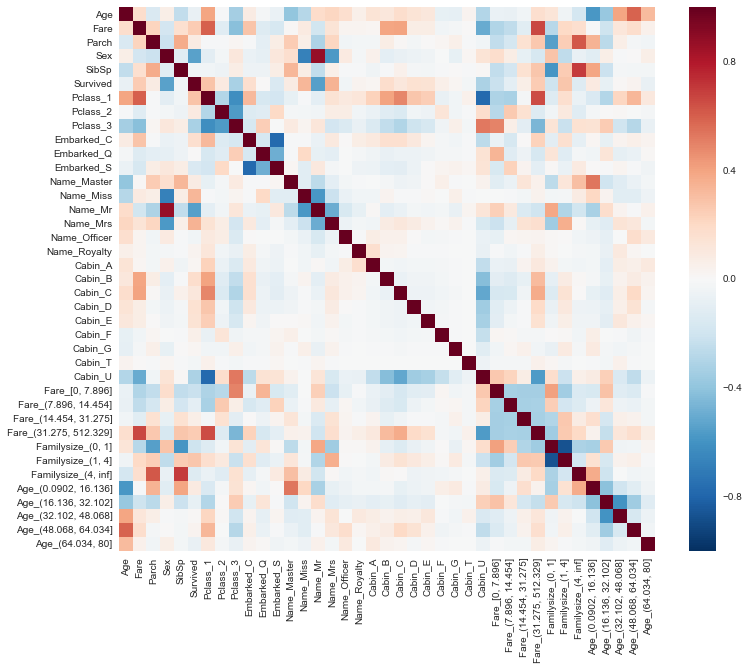

In [203]:
plt.figure(figsize=(12,10))
sns.heatmap(full.corr())

从相关系数上来看，似乎除了年龄这个特征，其他的特征对生存率的影响都比较显著

In [209]:
#删除不显著以及已分箱变量
full=full.drop(['Age','Fare','Parch','SibSp','Cabin','Embarked','Name'],axis=1)

### 3.2.2 特征选择函数

In [670]:
''' 通过L1范数模型(根据系数大小,如Lasso)，或者树型模型(根据特征重要性，如随机森林)进行特征选择，也可以不用feature_selection里的方法，
直接眼睛识别。
优先考虑tree_based,然后L1_based,最后才是用这些小功能'''

' 通过L1范数模型(根据系数大小,如Lasso)，或者树型模型(根据特征重要性，如随机森林)进行特征选择，也可以不用feature_selection里的方法，\n直接眼睛识别。\n优先考虑tree_based,然后L1_based,最后才是用这些小功能'

In [758]:
from sklearn.feature_selection import SelectFromModel,RFE,SelectKBest,f_classif
from sklearn.svm import SVR #svr是回归，svc是分类
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Lasso

In [759]:
full[full.Survived.isnull()].head()

,Sex,Survived,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,...,"Familysize_(4, inf]","Fare_[0, 7.896]","Fare_(7.896, 14.454]","Fare_(14.454, 31.275]","Fare_(31.275, 512.329]","Age_(0.0902, 16.136]","Age_(16.136, 32.102]","Age_(32.102, 48.068]","Age_(48.068, 64.034]","Age_(64.034, 80]"
891,1,NaN,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
892,0,NaN,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
893,1,NaN,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
894,1,NaN,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
895,0,NaN,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [212]:
X=full.drop('Survived',axis=1)[0:891]

In [213]:
X.tail()

,Sex,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Name_Master,Name_Miss,Name_Mr,...,"Fare_(14.454, 31.275]","Fare_(31.275, 512.329]","Familysize_(0, 1]","Familysize_(1, 4]","Familysize_(4, inf]","Age_(0.0902, 16.136]","Age_(16.136, 32.102]","Age_(32.102, 48.068]","Age_(48.068, 64.034]","Age_(64.034, 80]"
886,1,0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
887,0,1,0,0,0,0,1,0,1,0,...,1,0,1,0,0,0,1,0,0,0
888,0,0,0,1,0,0,1,0,1,0,...,1,0,0,1,0,0,1,0,0,0
889,1,1,0,0,1,0,0,0,0,1,...,1,0,1,0,0,0,1,0,0,0
890,1,0,0,1,0,1,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0


In [214]:
Y=full.Survived[0:891]

In [215]:
Y=Y.astype('int')

In [216]:
Y.tail()

886    0
887    1
888    0
889    1
890    0
Name: Survived, dtype: int64

#### 测试RFE

In [ ]:
rfe=RFE(estimator=SVR(kernel="linear"),n_features_to_select=30,step=1)

In [ ]:
rfe.fit_transform(X,Y)

In [ ]:
rfe.get_support()

In [ ]:
rfe.score(X,Y)

#### 测试selectkbest

In [ ]:
modle1=SelectKBest(f_classif,k=20)#默认f检验

In [ ]:
Y_df=pd.DataFrame(Y)

In [ ]:
model1.fit(X,Y_df)#不解？

#### 测试selectfromModel

In [ ]:
model2=SelectFromModel(estimator=Lasso)

In [ ]:
model2.fit(X=X.as_matrix(),y=Y.as_matrix())

### Lasso看系数

In [678]:
model3=Lasso()

In [679]:
model3.fit(X,Y)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [680]:
model3.coef_

array([-0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0., -0.,  0.,  0., -0.,
        0.,  0., -0.,  0.,  0., -0.,  0., -0.,  0., -0.,  0., -0., -0.,
       -0.,  0.,  0.,  0., -0.,  0.,  0., -0.])

### 随机森林看特征重要度

In [682]:
model4=RandomForestClassifier()#

In [683]:
model4.fit(X,Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [684]:
model4.feature_importances_

array([  1.70734079e-01,   5.11346797e-03,   1.45240448e-02,
         1.15665187e-02,   7.97231605e-03,   9.74679258e-03,
         2.10329219e-03,   1.63052679e-03,   1.26794909e-04,
         4.47440001e-02,   2.93738962e-02,   2.87861813e-02,
         5.44976621e-02,   1.92715114e-02,   1.08616798e-02,
         2.08356268e-02,   1.18228305e-02,   4.15173011e-02,
         2.08742842e-01,   8.87201289e-03,   1.47106203e-02,
         9.95206065e-04,   2.52407458e-02,   2.40139148e-02,
         4.97827709e-02,   2.00033086e-02,   1.76338597e-02,
         2.35017201e-02,   3.70708700e-02,   1.69642321e-02,
         2.44446898e-02,   2.23991332e-02,   1.50917972e-02,
         5.30375398e-03])

In [685]:
pd.Series(index=X.columns,data=model4.feature_importances_).sort_values(ascending=False)

Name_Mr                   0.208743
Sex                       0.170734
Pclass_3                  0.054498
Familysize_(4, inf]       0.049783
Cabin_U                   0.044744
Name_Miss                 0.041517
Fare_(31.275, 512.329]    0.037071
Pclass_1                  0.029374
Pclass_2                  0.028786
Familysize_(0, 1]         0.025241
Age_(16.136, 32.102]      0.024445
Familysize_(1, 4]         0.024014
Fare_(14.454, 31.275]     0.023502
Age_(32.102, 48.068]      0.022399
Embarked_S                0.020836
Fare_[0, 7.896]           0.020003
Embarked_C                0.019272
Fare_(7.896, 14.454]      0.017634
Age_(0.0902, 16.136]      0.016964
Age_(48.068, 64.034]      0.015092
Name_Officer              0.014711
Cabin_B                   0.014524
Name_Master               0.011823
Cabin_C                   0.011567
Embarked_Q                0.010862
Cabin_E                   0.009747
Name_Mrs                  0.008872
Cabin_D                   0.007972
Age_(64.034, 80]    

特征重要性上来看，船舱号是最不显著的，可以考虑删除

In [2]:
#最终特征选择,删除不显著以及已分箱变量
full=full.drop(['Age','Fare','Parch','SibSp','Cabin','Embarked','Name'],axis=1)

# 4.建模

## 4.1 建立训练集和测试集

In [217]:
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression

In [218]:
source_X=X[0:891]

In [219]:
source_y=Y[0:891]

In [220]:
pred_X=X[891:]

In [221]:
train_X,test_X,train_y,test_y=cross_validation.train_test_split(source_X,source_y,train_size=0.8)

## 4.2 建立并拟合模型

In [222]:
#采用Logestic回归建模
model5=LogisticRegression()

In [223]:
#拿训练集数据训练模型
model5.fit(train_X,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [224]:
pred_y=model5.predict(test_X)

In [225]:
pre_train_y=model5.predict(train_X)

## 4.3 评估模型

In [226]:
from sklearn.metrics import accuracy_score,recall_score,f1_score,roc_curve,roc_auc_score
#model.score可以直接得到准确率

#### 训练集评估

In [227]:
model5.score(train_X,train_y)

0.8370786516853933

In [228]:
recall_score(train_y,pre_train_y)

0.77777777777777779

In [229]:
f1_score(train_y,pre_train_y)

0.78358208955223874

In [230]:
train_prob=model5.predict_proba(train_X)

In [231]:
roc_auc_score(train_y,train_prob[:,1])

0.88592257415786824

In [232]:
FPR1,TPR1,tresholds1=roc_curve(train_y,train_prob[:,1])

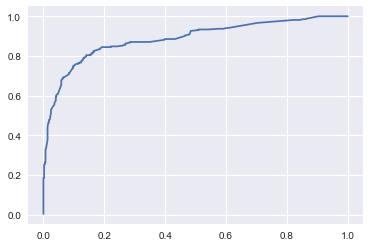

In [233]:
#画ROC曲线
plt.plot(FPR1,TPR1)

#### 测试集评估

In [234]:
model5.score(test_X,test_y)#就是accuracy_score

0.81005586592178769

In [235]:
accuracy_score(test_y,pred_y)

0.81005586592178769

In [236]:
recall_score(test_y,pred_y)

0.73611111111111116

In [237]:
f1_score(test_y,pred_y)

0.75714285714285723

In [238]:
test_prob=model5.predict_proba(test_X)

In [239]:
roc_auc_score(test_y,test_prob[:,1])

0.86863966770508838

In [240]:
FPR2,TPR2,tresholds2=roc_curve(test_y,test_prob[:,1])

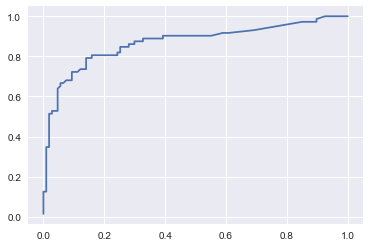

In [241]:
plt.plot(FPR2,TPR2)

In [649]:
#model5.fit_transform(test_X,test_y)不知道意义是什么

/Users/xucoolboy/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 1, 1, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 1]])

# 5.方案实施

### 5.1 预测验证集

In [865]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [867]:
#预测验证集的结果
pre_test=model5.predict(full[891:].drop('Survived',axis=1))

In [884]:
pre_test_df=pd.DataFrame({'PassengerId':test_df.PassengerId,'Survived':pre_test})

In [886]:
#写出到csv文件
pre_test_df.to_csv('titanic_pred.csv',index=False)

### 5.2 结论

本次结果在kaggle的正确率达到80%，想要继续提升准确率还得在特征工程上下功夫，再然后才是用更适合的模型来调参调优